In [3]:
library(igraph)
library(dplyr)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



In [10]:
ratings_raw <- readLines("data/ratings.dat")
ratings_raw <- gsub("::", ",", ratings_raw)
ratings_data <- read.table(text=ratings_raw, sep=',') %>% as.data.frame(stringsAsFactors=F)

V1,V2,V3,V4
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
1,1197,3,978302268


In [12]:
colnames(ratings_data) <- c('UserId', 'MovieId', 'Rating', 'Timestamp')
head(ratings_data)

UserId,MovieId,Rating,Timestamp
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
1,1197,3,978302268


In [17]:
ratings_data$MovieId <- ratings_data$MovieId %>% as.factor()
ratings_data$Rating <- ratings_data$Rating %>% as.numeric()

In [52]:
movieid_count = ratings_data %>% group_by('MovieId' = ratings_data$MovieId) %>% summarise(Count = n())
average_rating = ratings_data  %>%  group_by('MovieId' = ratings_data$MovieId) %>% summarise('Average Rating' = sum(ratings_data$Rating))
average_rating

MovieId,Average Rating
1,3582313
2,3582313
3,3582313
4,3582313
5,3582313
6,3582313
7,3582313
8,3582313
9,3582313
10,3582313


In [15]:
movieid_count$MovieId <- factor(movieid_count$MovieId, levels=unique(movieid_count[order(-movieid_count$Count), ])$MovieId, ordered=T)

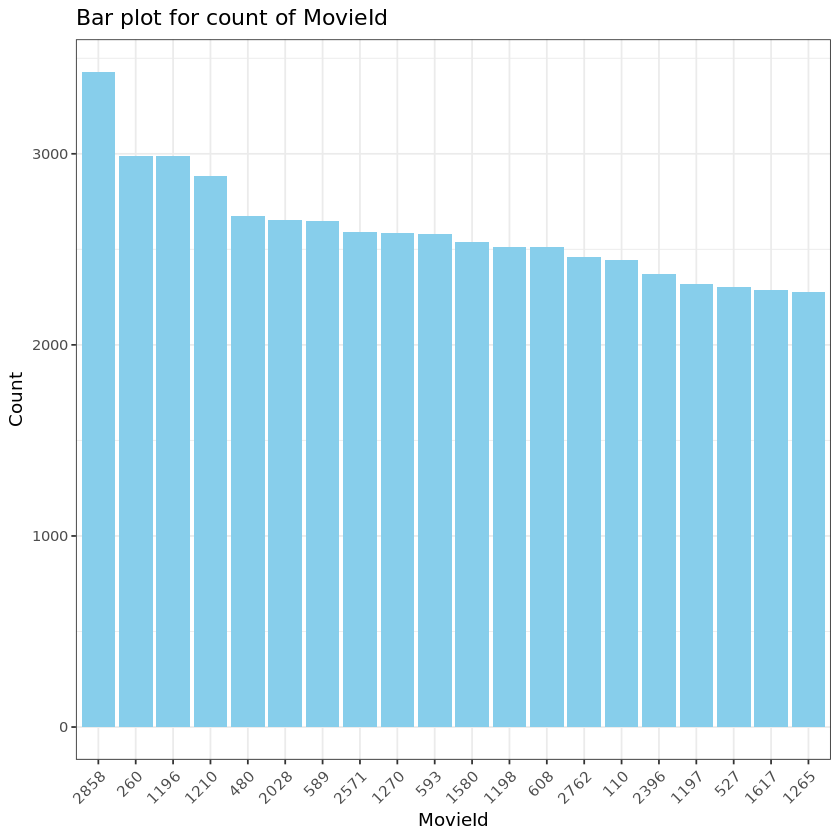

In [16]:
movieid_count <- movieid_count[order(-movieid_count$Count), ]
ggplot(movieid_count[1:20, ], aes(x = MovieId, y = Count)) + 
  theme_bw() +
  scale_fill_manual(guide = FALSE) +
  ggtitle("Bar plot for count of MovieId") +
  theme(
    axis.text.x=element_text(angle = 45, vjust = 1, size = 9, hjust = 1)
  ) +
  xlab("MovieId") +
  ylab("Count") +
  geom_bar(stat="identity", fill='skyblue')